## PCA

### Task 1: Exploratory Data Analysis (EDA):

##### 1) Load the dataset and perform basic data exploration.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('wine.csv')

In [5]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df['Type'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
### checking missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
### There are no missing values

In [12]:
### checking duplicate values
df.duplicated().sum()

0

In [13]:
### There are no duplicate values

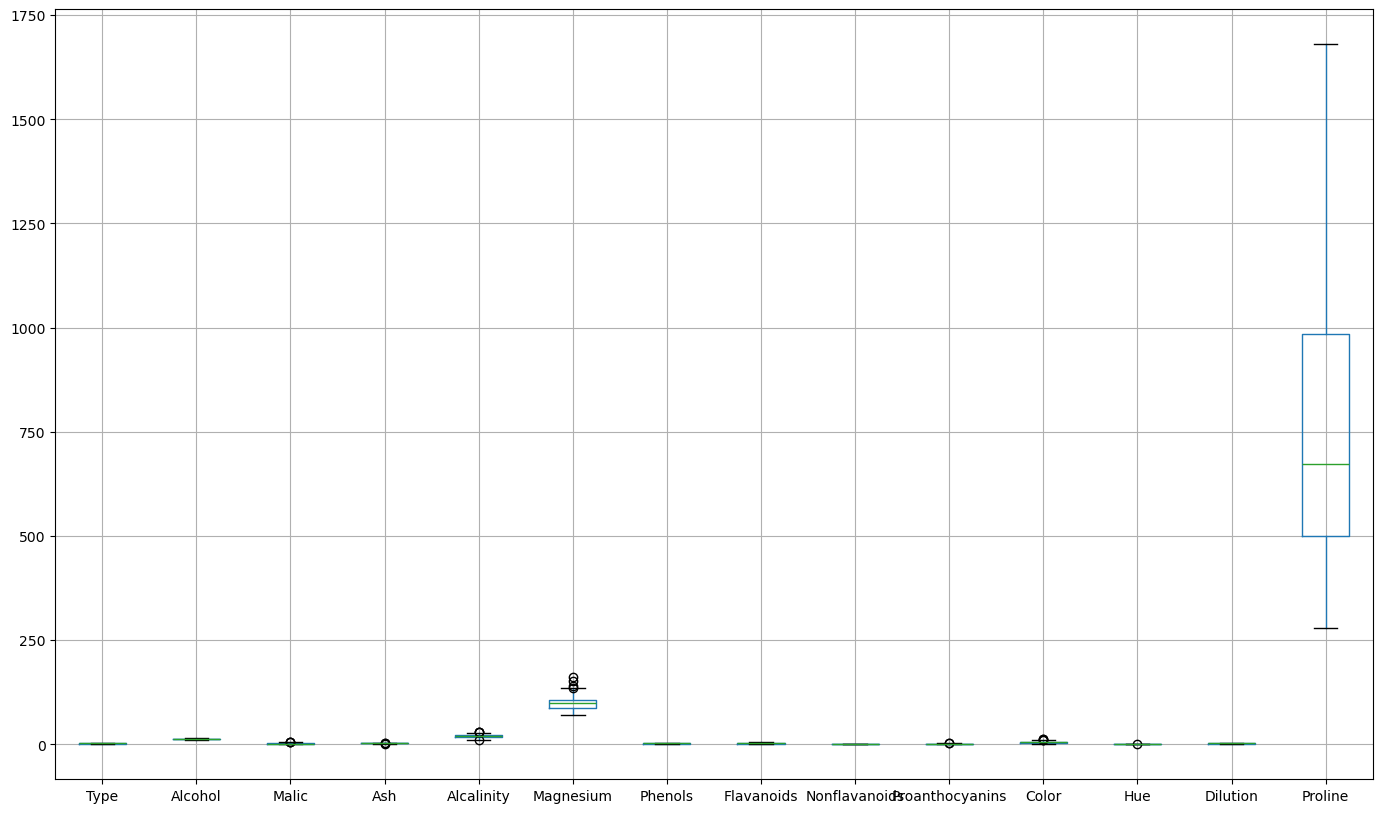

In [14]:
### checking outliers in the data
plt.figure(figsize=(17,10))
df.boxplot()
plt.show()

In [15]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

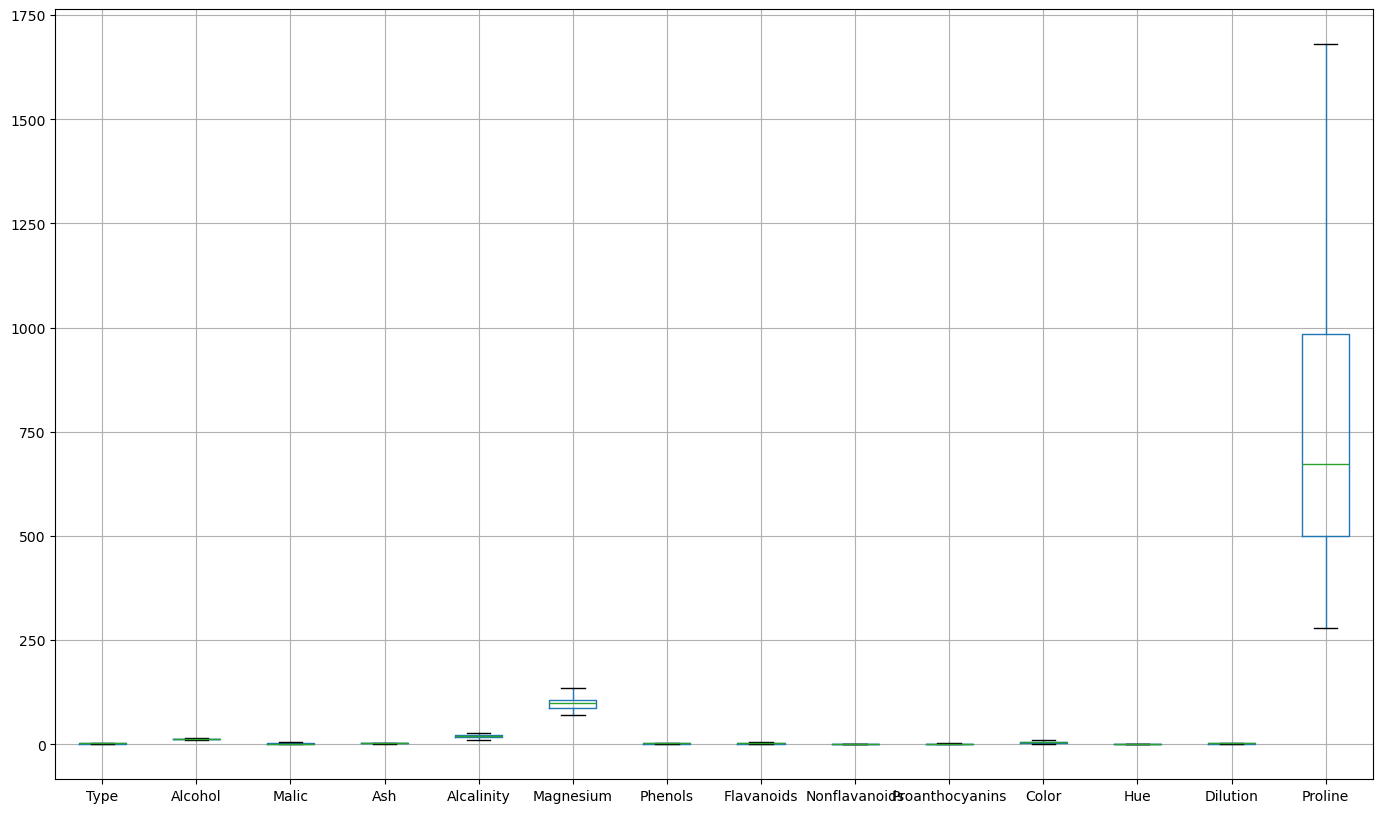

In [16]:
plt.figure(figsize=(17,10))
df.boxplot()
plt.show()

##### 2) Examine the distribution of features using histograms, box plots, or density plots.

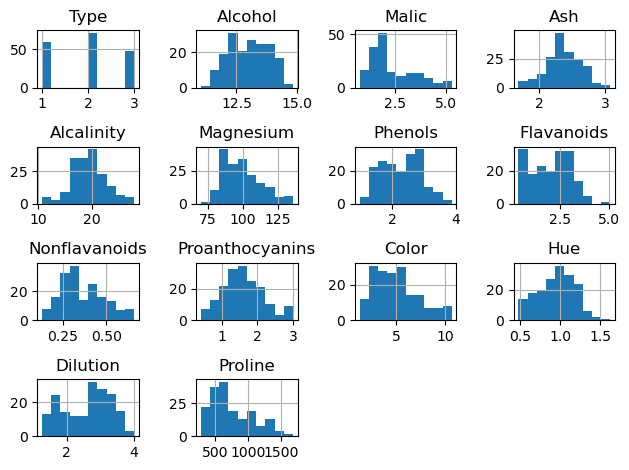

In [17]:
df.hist()
plt.tight_layout()
plt.show()

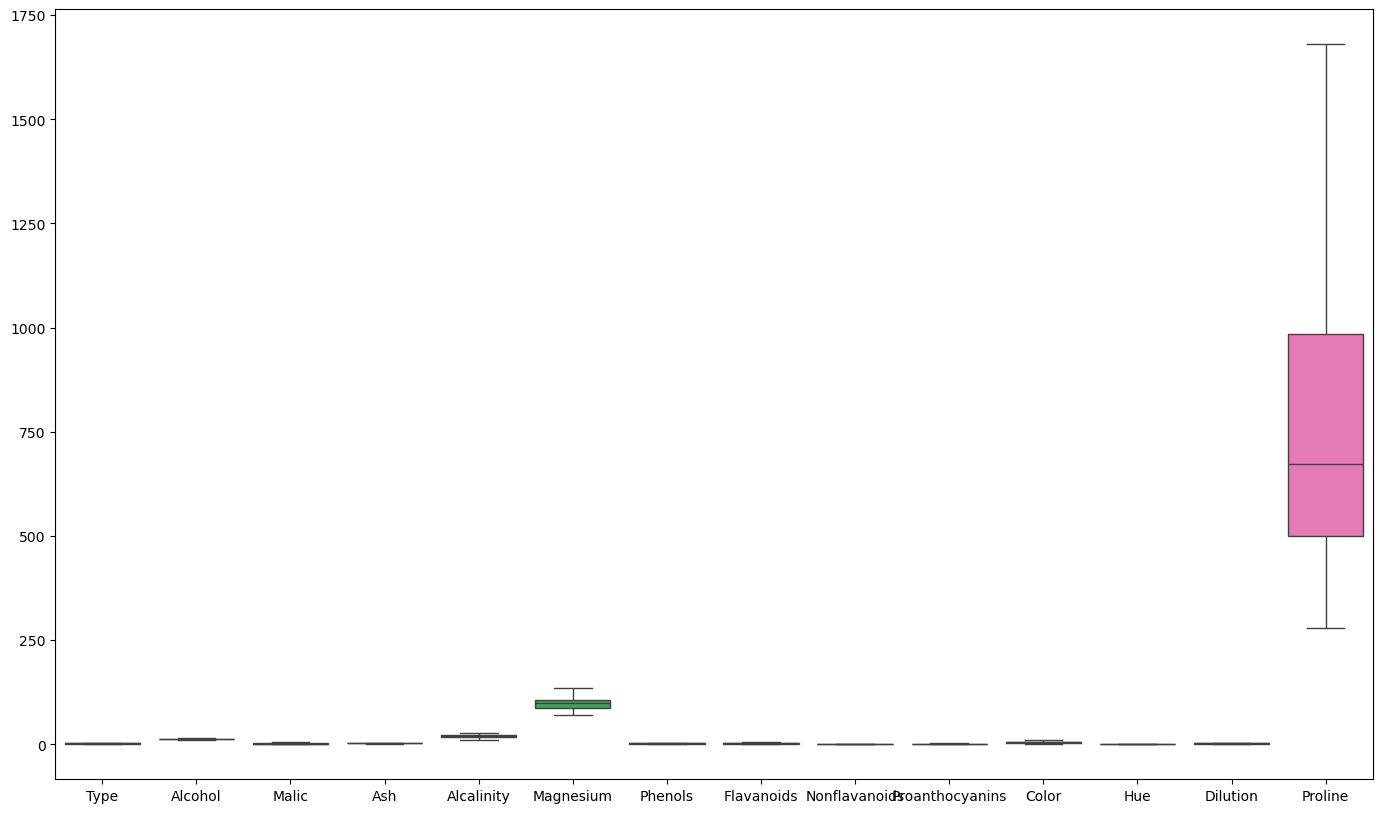

In [18]:
plt.figure(figsize=(17,10))
sns.boxplot(data=df)
plt.show()

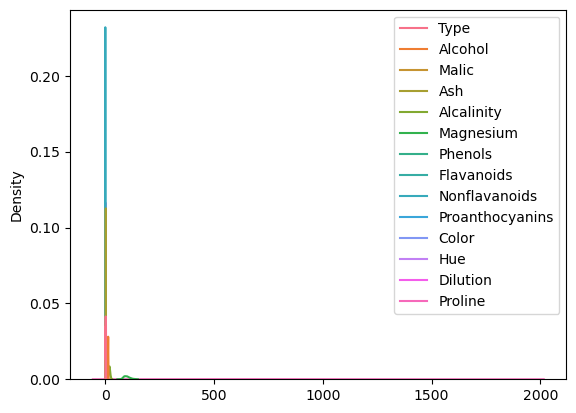

In [19]:
sns.kdeplot(data=df)
plt.show()

##### 3) Investigate correlations between features to understand relationships within the data.

In [20]:
target=df[['Type']]
features=df.drop(columns=['Type'])

In [21]:
features.dtypes

Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium          float64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [22]:
target.dtypes

Type    int64
dtype: object

<Axes: >

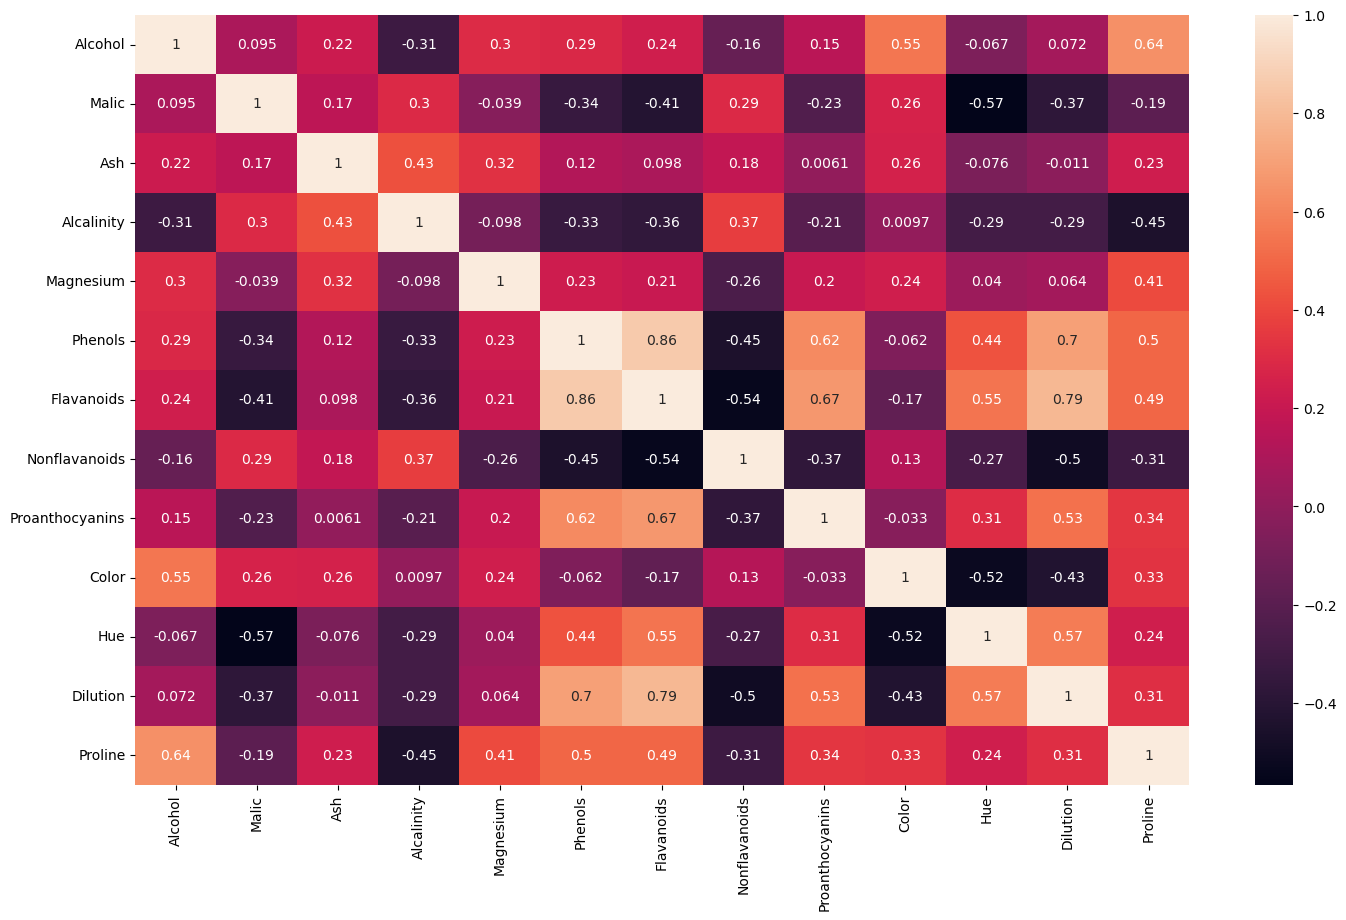

In [23]:
corr=features.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True)

In [24]:
from sklearn.feature_selection import f_classif

In [25]:
f_clas=f_classif(features,target)
f_clas

(array([135.07762424,  38.00634336,  13.94145573,  36.98643237,
         16.24281148,  93.73300962, 233.92587268,  27.57541715,
         32.22699653, 126.60980354, 103.45653801, 189.97232058,
        207.9203739 ]),
 array([3.31950380e-36, 1.96091126e-14, 2.40907743e-06, 4.00431119e-14,
        3.38359572e-07, 2.13767002e-28, 3.59858583e-50, 3.88804090e-11,
        1.21310096e-12, 9.88567328e-35, 2.20766438e-30, 1.39310496e-44,
        5.78316836e-47]))

In [26]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False)

Flavanoids         233.925873
Proline            207.920374
Dilution           189.972321
Alcohol            135.077624
Color              126.609804
Hue                103.456538
Phenols             93.733010
Malic               38.006343
Alcalinity          36.986432
Proanthocyanins     32.226997
Nonflavanoids       27.575417
Magnesium           16.242811
Ash                 13.941456
dtype: float64

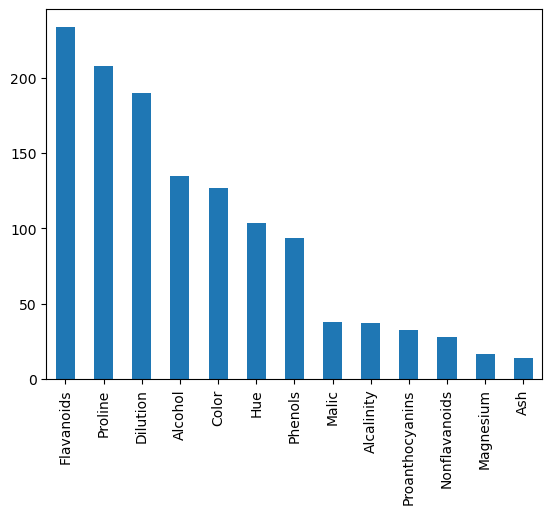

In [27]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [28]:
features.drop(columns=['Magnesium','Ash'],inplace=True)

In [29]:
features.head()

,Alcohol,Malic,Alcalinity,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


### Task 2: Dimensionality Reduction with PCA:

##### 1) Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
features.head()

,Alcohol,Malic,Alcalinity,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,15.6,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
numeric_cols=features.select_dtypes(include=[np.number]).columns.tolist()

In [34]:
numeric_cols

['Alcohol',
 'Malic',
 'Alcalinity',
 'Phenols',
 'Flavanoids',
 'Nonflavanoids',
 'Proanthocyanins',
 'Color',
 'Hue',
 'Dilution',
 'Proline']

In [35]:
std_sca=StandardScaler()

In [36]:
x=features[numeric_cols].values
x

array([[1.423e+01, 1.710e+00, 1.560e+01, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 1.120e+01, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 1.860e+01, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.000e+01, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.000e+01, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.450e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [37]:
features[numeric_cols]=std_sca.fit_transform(x)

In [38]:
features.head()

,Alcohol,Malic,Alcalinity,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,-1.182882,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-2.524956,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,-0.267832,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,-0.816862,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,0.464208,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [39]:
### Now the whole data is standardized such that the mean is 0

##### 2) Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA()

In [42]:
pca.fit(features)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [43]:
explained_variance_ratio=pca.explained_variance_ratio_

In [44]:
cumulative_variance=np.cumsum(explained_variance_ratio)

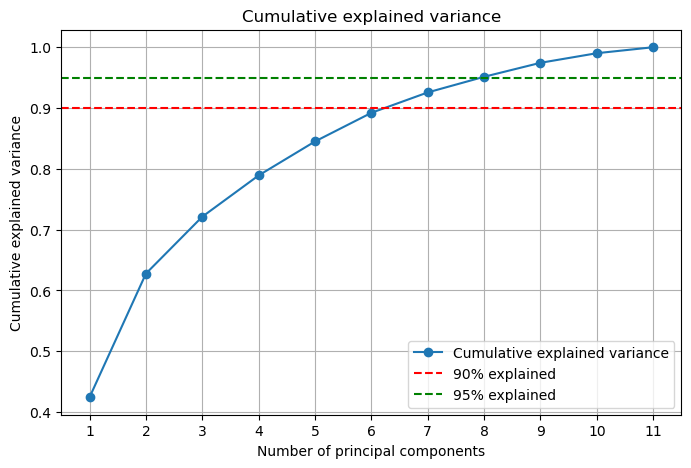

In [45]:
# Cumulative explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, 'o-', label='Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% explained')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% explained')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(1, len(cumulative_variance)+1))
plt.show()

In [46]:
ev_df = pd.DataFrame({
    'PC': np.arange(1, len(explained_variance_ratio)+1),
    'ExplainedVarianceRatio': explained_variance_ratio,
    'CumulativeVariance': cumulative_variance
})
print("\nExplained variance per principal component (top rows):")
print(ev_df.head(15).round(4))


Explained variance per principal component (top rows):
    PC  ExplainedVarianceRatio  CumulativeVariance
0    1                  0.4243              0.4243
1    2                  0.2034              0.6277
2    3                  0.0936              0.7213
3    4                  0.0679              0.7892
4    5                  0.0559              0.8450
5    6                  0.0471              0.8921
6    7                  0.0336              0.9257
7    8                  0.0257              0.9514
8    9                  0.0230              0.9744
9   10                  0.0158              0.9902
10  11                  0.0098              1.0000


In [47]:
threshold = 0.95
optimal_components = int(np.searchsorted(cumulative_variance, threshold) + 1)
print(f"\nOptimal number of components for {threshold*100:.0f}% variance: {optimal_components}")


Optimal number of components for 95% variance: 8


##### 3) Transform the original dataset into the principal components.

In [48]:
pca_final = PCA(n_components=optimal_components)
features_pca=pca_final.fit_transform(features)

In [49]:
features_pca

array([[ 3.07384118,  1.16707305,  0.00536204, ..., -0.22973782,
         0.01487018,  0.76181016],
       [ 2.24024575,  0.35432464, -1.72928181, ..., -0.47495907,
        -0.77821943, -0.35200799],
       [ 2.52983032,  0.82269432,  1.10892142, ..., -0.70674386,
         0.85364126, -0.52429852],
       ...,
       [-2.99110081,  2.6084317 ,  0.31197274, ..., -0.40890054,
         0.3134315 , -0.50632039],
       [-2.66731002,  1.95432107, -0.26474314, ..., -0.67420862,
        -0.05444989, -0.26844335],
       [-3.2810454 ,  2.34419433,  1.26485744, ...,  0.18640717,
        -0.18871092,  0.74837296]])

In [60]:
pc_columns = [f'PC{i+1}' for i in range(features_pca.shape[1])]
df_pca = pd.DataFrame(features_pca, columns=pc_columns)
print("\nPCA-transformed data (first 5 rows):")
print(df_pca.head())


PCA-transformed data (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.073841  1.167073  0.005362 -0.105780  0.297188 -0.229738  0.014870   
1  2.240246  0.354325 -1.729282 -1.058593  0.740184 -0.474959 -0.778219   
2  2.529830  0.822694  1.108921  0.259030 -0.271938 -0.706744  0.853641   
3  3.602149  2.809842  0.617953  0.098962 -0.139915  0.263246 -0.794724   
4  0.842976 -0.162598  0.861949  0.496772  0.463023  0.128251 -0.161823   

        PC8  
0  0.761810  
1 -0.352008  
2 -0.524299  
3 -0.512423  
4  0.201165  


### Task 3: Clustering with Original Data:

##### 1) Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
k_means_original=KMeans(n_clusters=3,random_state=42)
labels_original=k_means_original.fit_predict(features)

##### 2) Visualize the clustering results using appropriate plots.

In [52]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(features)

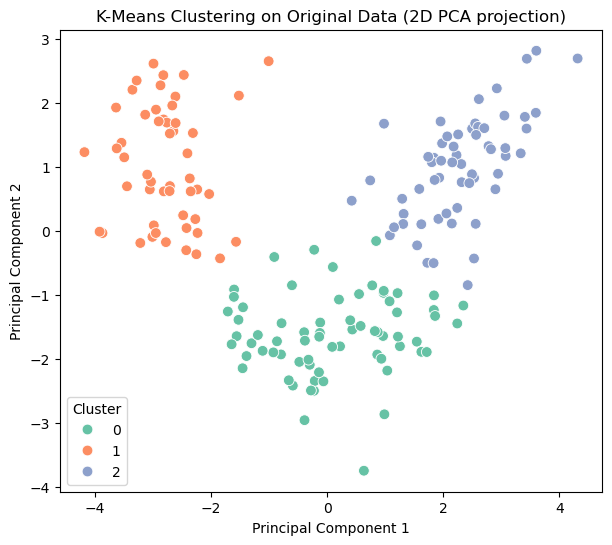

In [53]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=labels_original, palette='Set2', s=60)
plt.title("K-Means Clustering on Original Data (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

##### 3) Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [55]:
sil_original = silhouette_score(features, labels_original)
print("=== Clustering Performance (Original Data) ===")
print(f"Silhouette Score: {sil_original:.4f}")

=== Clustering Performance (Original Data) ===
Silhouette Score: 0.3121


### Task 4: Clustering with PCA Data:

##### 1) Apply the same clustering algorithm to the PCA-transformed dataset.

In [56]:
k_means_pca=KMeans(n_clusters=3,random_state=42)
labels_pca=k_means_pca.fit_predict(features_pca)

##### 2)Visualize the clustering results obtained from PCA-transformed data.

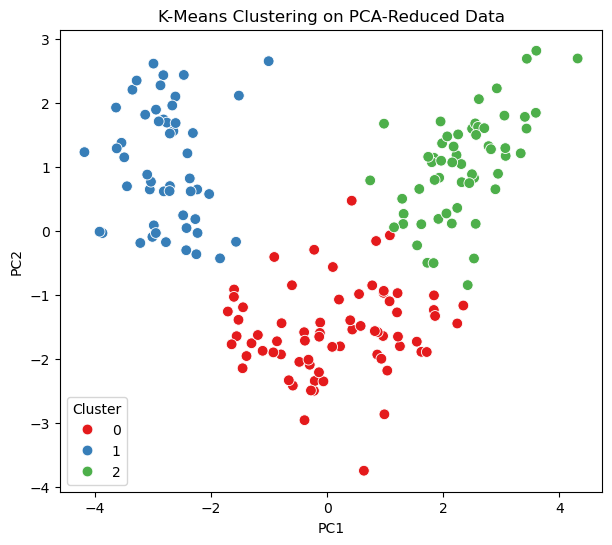

In [59]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1],
                hue=labels_pca, palette='Set1', s=60)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

##### 3)Compare the clustering results from PCA-transformed data with those from the original dataset.

In [63]:
print("=== COMPARISON SUMMARY ===")
print(f"Number of PCA Components Used: {optimal_components}")
print(f"Silhouette (Original): {sil_original:.4f}")
print(f"Silhouette (PCA): {sil_pca:.4f}")

=== COMPARISON SUMMARY ===
Number of PCA Components Used: 8
Silhouette (Original): 0.3121
Silhouette (PCA): 0.3290


#### Task 5: Comparison and Analysis:

##### 1) Compare the clustering results obtained from the original dataset and PCA-transformed data.

After applying K-Means clustering to both the original standardized dataset and the PCA-transformed dataset, we compared the performance using:

Silhouette Score – measures how similar samples are to their own cluster compared to other clusters. Higher = better.
In this case, the pca transformed dataset has a slightly higher silhouette score than the original dataset.

##### 2)Discuss any similarities or differences observed in the clustering results.

##### 3) Reflect on the impact of dimensionality reduction on clustering performance.

##### 4) Analyze the trade-offs between using PCA and clustering directly on the original dataset.

CLustering on original data is slower,higher dimesnsional. The original features are preserved. It may also be affected by noise or correlation The use case of this is when interpretability of features matter.
Clustering on PCA data is faster, fewer dimensions. Cluster quality is often improved compactness. Principal components are abstract. The use case of this is when efficiency and seperation matter.

### Task 6: Conclusion and Insights

##### 1) Summarize the key findings and insights from the assignment.

##### 2) Discuss the practical implications of using PCA and clustering in data analysis.

##### 3) Provide recommendations for when to use each technique based on the analysis conducted.